# Explore the dataset

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:

class MinMaxScaler:
    def __init__(self, data, min_=0, max_=1) -> None:
        self.data_min = np.min(data)
        self.data_max = np.max(data)
        self.min_ = min_
        self.max_ = max_

    def transform(self, x):
        d_diff = self.data_max - self.data_min + 1e-32
        s_diff = self.max_ - self.min_
        return (x - self.data_min) / d_diff * s_diff + self.min_

    def inverse_transform(self, x):
        d_diff = self.data_max - self.data_min + 1e-32
        s_diff = self.max_ - self.min_
        return (x - self.min_) / s_diff * d_diff + self.data_min



class ChannelMinMaxScaler(MinMaxScaler):
    def __init__(self, data, axis_apply, min_=0, max_=1) -> None:
        super().__init__(data, min_, max_)
        self.data_min = np.nanmin(data, axis=axis_apply, keepdims=True)
        self.data_max = np.nanmax(data, axis=axis_apply, keepdims=True)
        

In [15]:
# plot utilies

def plot_field(field, vmin, vmax):
    '''field: shape [x, y]'''
    fig, axs = plt.subplots(4,4, figsize=(10,8))
    for i, ax in enumerate(axs.ravel()):
        im = ax.imshow(field[...,i].T, 
                cmap='rainbow',
                origin='lower',
                aspect='auto',
                vmin=vmin[i],
                vmax=vmax[i])
        ax.set_box_aspect(1)
        ax.axis('off')
        fig.colorbar(im)
    plt.tight_layout()
    plt.show()
    return fig


def plot_progression(data, name='Redi'):
    '''
    data to be plotted has shape [100, 100, t] t being time or parameter values
    '''
    plt.rcParams['text.usetex'] = False
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['font.size'] = 12
    
    batch_size = data.shape[-1] // 5
    fig, axs = plt.subplots(1, 5, figsize=(10,2))
    data = data[..., ::batch_size]
    for i, ax in enumerate(axs):
        if name is not None: # now data shape [100, 100, 2, t]:
            d = data[..., 0, i].T
            gm = np.nanmax(data[..., -1, i])
            gm_m = np.nanmin(data[..., -1, i])
            assert gm == gm_m
        else:
            d = data[..., i].T
        im = ax.imshow(d, 
                cmap='seismic',
                origin='lower',
                aspect='auto',
                vmin=np.nanmin(d),
                vmax=np.nanmax(d))
        ax.set_box_aspect(1)
        ax.axis('off')
        if name is not None:
            ax.set_title(r'${}={:.2e}$'.format(name, gm))
        else:
            ax.set_title(r'$t={}$'.format(i*batch_size))
    cbar_ax = fig.add_axes([0.15, -0.05, 0.7, 0.05])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label=r'Temperature $[^\circ C]$')
    cbar.set_label(r'Temperature $[^\circ C]$', fontsize=16) 
    return fig




In [10]:
# Load the data set

data = h5py.File('/pscratch/sd/y/yixuans/datatset/SOMA/thedataset-cvmix-2.hdf5', 'r')
print(data.keys())
print(len(data.keys()))

<KeysViewHDF5 ['forward_0', 'forward_1', 'forward_10', 'forward_11', 'forward_12', 'forward_13', 'forward_14', 'forward_15', 'forward_16', 'forward_17', 'forward_18', 'forward_19', 'forward_2', 'forward_20', 'forward_21', 'forward_22', 'forward_23', 'forward_24', 'forward_25', 'forward_26', 'forward_27', 'forward_28', 'forward_29', 'forward_3', 'forward_30', 'forward_31', 'forward_32', 'forward_33', 'forward_34', 'forward_35', 'forward_36', 'forward_37', 'forward_38', 'forward_39', 'forward_4', 'forward_40', 'forward_41', 'forward_42', 'forward_43', 'forward_44', 'forward_45', 'forward_46', 'forward_47', 'forward_48', 'forward_49', 'forward_5', 'forward_50', 'forward_51', 'forward_52', 'forward_53', 'forward_54', 'forward_55', 'forward_56', 'forward_57', 'forward_58', 'forward_59', 'forward_6', 'forward_60', 'forward_61', 'forward_62', 'forward_63', 'forward_64', 'forward_65', 'forward_66', 'forward_67', 'forward_68', 'forward_69', 'forward_7', 'forward_70', 'forward_71', 'forward_72',

In [11]:
# just to visually inspect the dataset
# create a folder for each forward run
# and plot out all 16 variables at each time step
# plot out the middle vertical layer

import os
from tqdm import tqdm
path = '/pscratch/sd/y/yixuans/'

def get_data(key):
    forward = data[key][...]



    mask1 = forward < -1e16
    mask2 = forward > 1e16
    mask = np.logical_or(mask1, mask2)


    forward[mask] = np.nan
    
    data_plot = forward[:, 10 , :, :, (10, 16)]
    data_plot = np.moveaxis(data_plot, 0, -1)


    return data_plot

data_gm = []
for k in tqdm(data.keys()):
    data_gm.append(get_data(k))


# for i in range(forward.shape[0]):
#     # scaler = ChannelMinMaxScaler(forward_0, (0, 1, 2, 3))
#     # forward_0 = scaler.transform(forward_0)


#     # import pickle

#     # with open('../tmp/SOMA_mask.pkl', 'wb') as f:
#     #     mask = {'mask1': mask1, 'mask2': mask2}
#     #     pickle.dump(mask, f)
#     for j in range(0, 60, 5):
#         print(j)
#         fig = plot_field(forward[28, j, :, :,: ], vmin=vmin, vmax=vmax)
#         if not os.path.exists(path + f'{k}/'):
#             os.makedirs(path + f'{k}/')
#         fig.savefig(path + f'{k}/{i}.pdf', format='pdf')
#         plt.show()
#         plt.close()
#     break
# break

# get the min max for all variables from the first example
# for i in range(forward_0.shape[-1]):
#     print((np.nanmin(forward_0[..., i]), np.nanmax(forward_0[..., i])))


# investigate where 0 is coming from in GM
# mask_0 = forward_0[...,-1] == 0
# a = forward_0
# a[mask_0] = 500
# for i in range(forward_0.shape[0]):
#     plt.imshow(a[i,0, ..., -1], cmap='seismic')
#     plt.show()



100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


(100, 30, 100, 100, 2)
(30, 100, 100, 2, 100)
(100, 100, 2, 100)


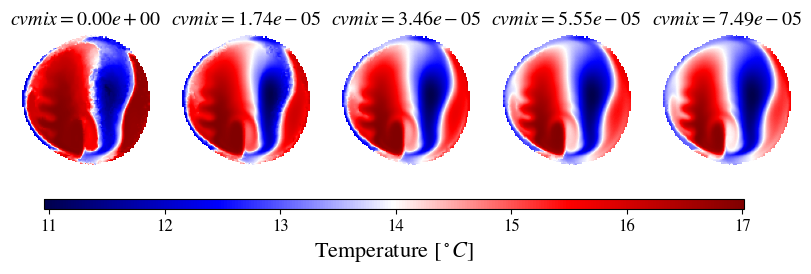

In [16]:
d = np.array(data_gm)
print(d.shape)
d = np.moveaxis(d, 0, -1)
print(d.shape)
gm = np.mean(d[29, :,:, 1, :], axis=(0,1))
idx = np.argsort(gm)
d = d[...,idx]
d = d[29]
print(d.shape)


fig  = plot_progression(d, 'cvmix')

fig.savefig('../eval_plots/cvmix_progression_temperature.pdf', format='pdf', bbox_inches='tight')

In [6]:
# load prediction data
import pickle
import numpy as np 

with open('/pscratch/sd/y/yixuans/2023-07-26-true_pred.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../tmp/SOMA_mask.pkl', 'rb') as f:
    mask = pickle.load(f)

mask = np.logical_or(mask['mask1'], mask['mask2'])
true = data['true'][0]
pred = data['pred'][0]

print(pred.shape)


true = np.transpose(true, axes=(0, 2, 3, 4, 1))
pred = np.transpose(pred, axes=(0, 2, 3, 4, 1))
print(pred.shape)

print(true.shape)
print(mask.shape)
mask_b = mask[0:1,0:1,:,:,0:1]
mask_b = np.broadcast_to(mask_b, true.shape)
print(mask_b.shape)
true[mask_b] = np.nan
pred[mask_b] = np.nan
print(true.shape, pred.shape)


(29, 16, 60, 100, 100)
(29, 60, 100, 100, 16)
(29, 60, 100, 100, 16)
(30, 60, 100, 100, 17)
(29, 60, 100, 100, 16)
(29, 60, 100, 100, 16) (29, 60, 100, 100, 16)


NameError: name 'plot_field' is not defined

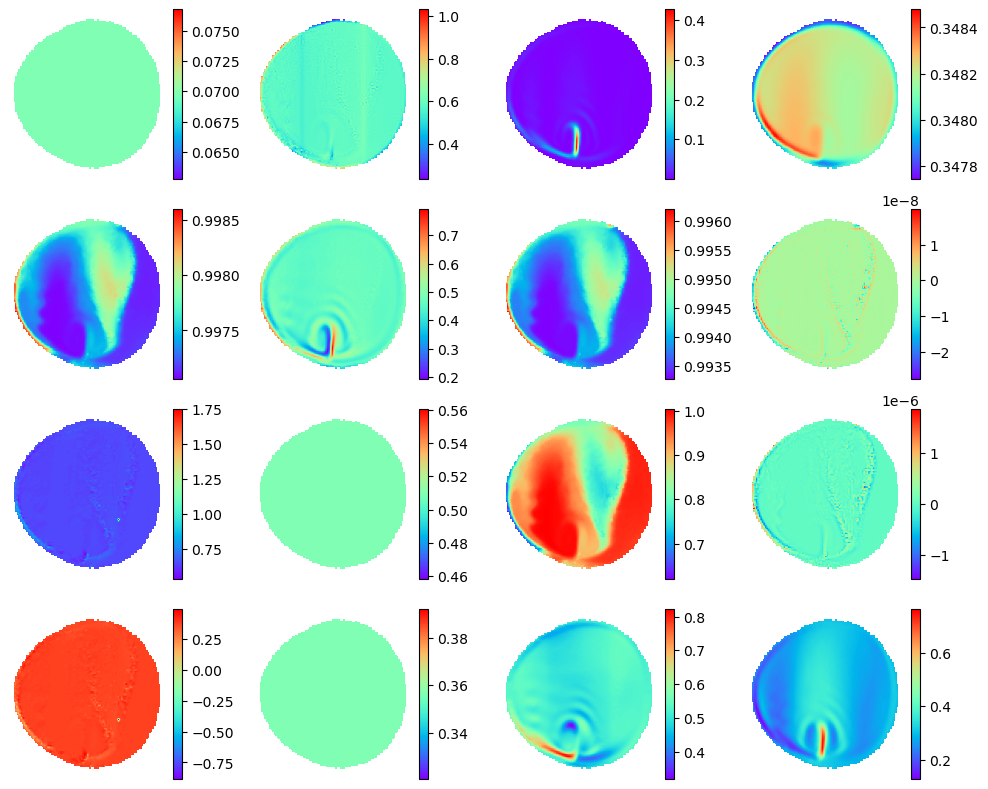

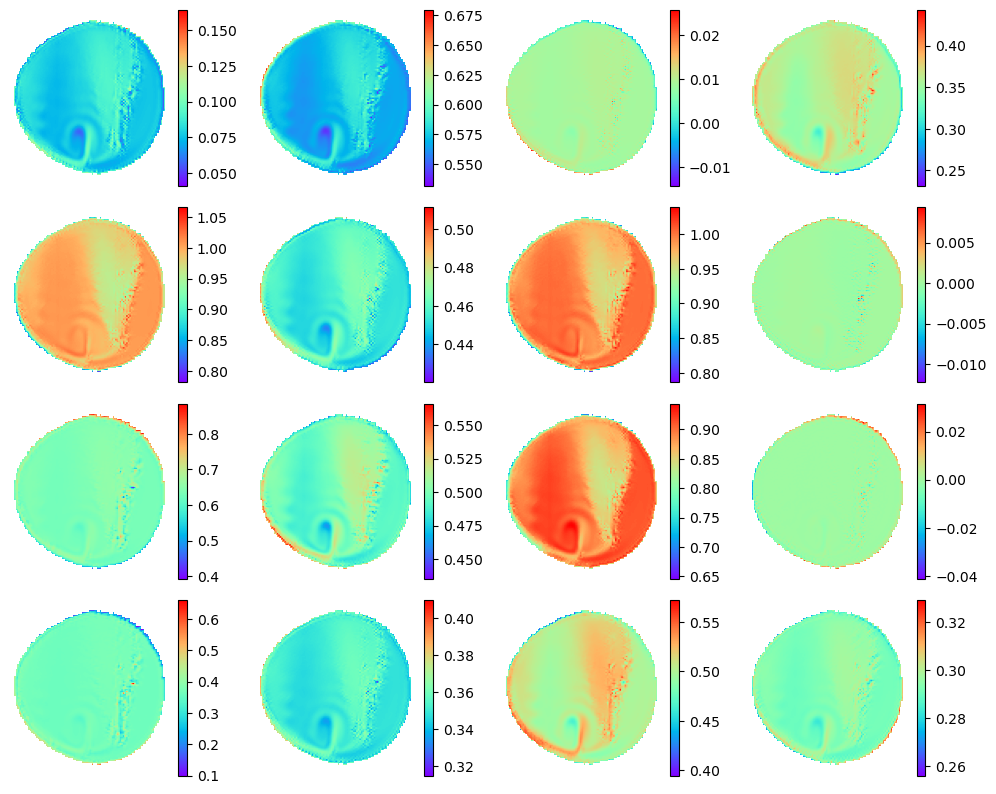

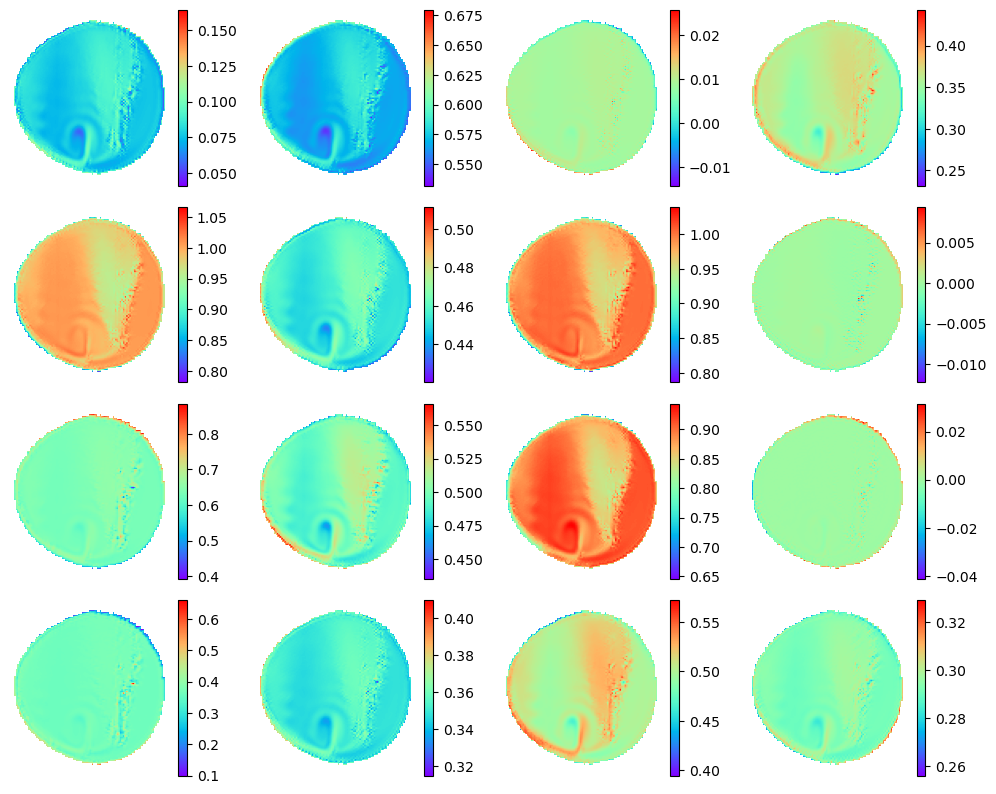

In [14]:
plot_field(true[0,0,...])
plot_field(pred[0,0, ...])

In [18]:
# report metric scores
from sklearn.metrics import r2_score

print(r2_score(np.nan_to_num(true.flatten()), np.nan_to_num(pred.flatten())))

: 

: 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (30,).

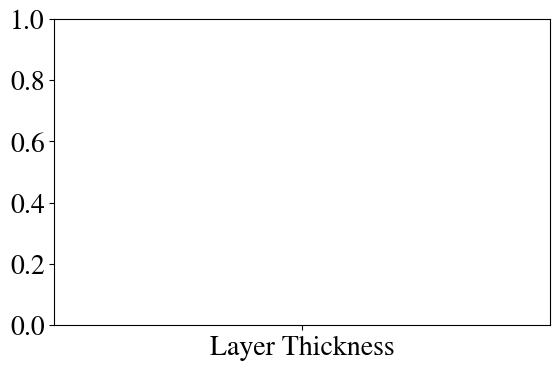

In [36]:
import numpy as np

adj = np.load('../GM_FD_0.001_adj.npy')

print(adj)
# adj = np.abs(adj)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_box_aspect(1/1.62)
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20

var_names = ['Layer Thickness', 'Salinity', 'Temperature', 'Zonal Velocity', 'Meridional Velociy'] 
values = np.mean(adj, axis=0)
from scipy.stats import sem
se = sem(adj, axis=0)

ax.bar(var_names, values, yerr=se, color='skyblue', alpha=0.7)
ax.set_ylabel(r'$\frac{\partial y}{\partial p}$', fontsize=30)
ax.yaxis.label.set_rotation(90)
ax.set_xticklabels(var_names, rotation=45, fontsize=20)
ax.grid(which='major',  color='lightgray', linestyle='-.')

fig.savefig('../eval_plots/adj_rank_GM_FD.pdf', format='pdf', bbox_inches='tight')

(6, 30, 60, 100, 100)
1150.0


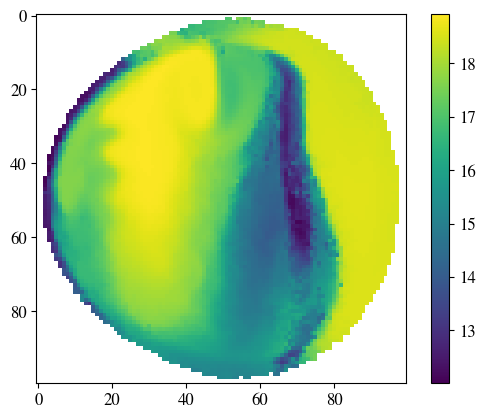

In [28]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

data_path = data_path_model = '/pscratch/sd/y/yixuans/datatset/SOMA/thedataset-GM.hdf5'
data = h5py.File(data_path, 'r')
f_1 = data['forward_1'][...]

mask = f_1 > 1e16 
mask2= f_1 < -1e16
mask = np.logical_or(mask, mask2)

f_1[mask] = np.nan

var_idx = [3, 6, 10, 14, 15] 
var_idx_in = var_idx + [-1]

f_1 = np.transpose(f_1, axes=[4, 0, 1, 2, 3])[var_idx_in]
print(f_1.shape)
fig, ax = plt.subplots()

im=ax.imshow(f_1[2, 0, 3, ...].T)
plt.colorbar(im)
print(f_1[-1, 0, 40, 50, 50].T)
plt.show()